In [1]:
import pandas as pd
import numpy as np

In [2]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [4]:
df = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')
df = df.dropna()

In [5]:
df

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


In [6]:
df.dtypes

artist_name          object
track_id             object
track_name           object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
popularity            int64
dtype: object

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric features relevant to your regression
features = ['popularity', 'danceability', 'energy', 'valence', 
            'tempo', 'loudness', 'acousticness', 'instrumentalness', 
            'speechiness', 'liveness']

# Create the correlation matrix
corr_matrix = df[features].corr()

# Display as a table
print(corr_matrix.round(2))

                  popularity  danceability  energy  valence  tempo  loudness  \
popularity              1.00          0.13    0.12     0.01   0.04      0.24   
danceability            0.13          1.00    0.29     0.46   0.08      0.43   
energy                  0.12          0.29    1.00     0.31   0.23      0.77   
valence                 0.01          0.46    0.31     1.00   0.10      0.32   
tempo                   0.04          0.08    0.23     0.10   1.00      0.22   
loudness                0.24          0.43    0.77     0.32   0.22      1.00   
acousticness           -0.12         -0.36   -0.71    -0.18  -0.22     -0.60   
instrumentalness       -0.22         -0.31   -0.30    -0.25  -0.09     -0.51   
speechiness            -0.00          0.25    0.11     0.12   0.05      0.07   
liveness               -0.03         -0.14    0.21    -0.01  -0.01      0.06   

                  acousticness  instrumentalness  speechiness  liveness  
popularity               -0.12             -0

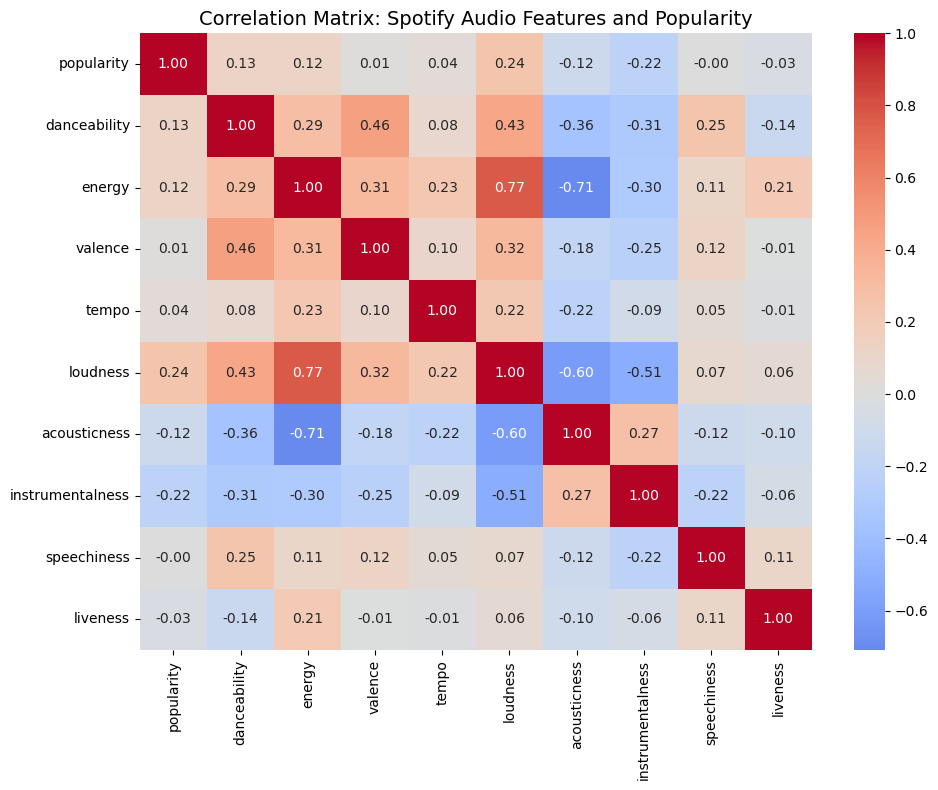

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix: Spotify Audio Features and Popularity', fontsize=14)
plt.tight_layout()
plt.show()

In [9]:
# Model specification
design_1 = MS(["danceability", "energy", "loudness", 
               "acousticness", "instrumentalness"])

# setup: recall that the data is 'df'
x_reg_1 = design_1.fit_transform(df)
y_1 = df['popularity']

# regression
result_1 = sm.OLS(y_1, x_reg_1).fit()

# show results
print('R-square:', round(result_1.rsquared, 3))
result_1_summary = summarize(result_1)

result_1_summary


R-square: 0.078


,coef,std err,t,P>|t|
intercept,39.5144,0.430,91.858,0.000
danceability,1.2071,0.314,3.843,0.000
energy,-10.4601,0.366,-28.542,0.000
loudness,0.8581,0.015,58.992,0.000
acousticness,-0.5308,0.222,-2.396,0.017
instrumentalness,-5.8597,0.172,-34.104,0.000


Descriptive statistics for 'popularity':
count    130662.000000
mean         24.208990
std          19.713266
min           0.000000
25%           7.000000
50%          22.000000
75%          38.000000
max         100.000000
Name: popularity, dtype: float64

Number of unique popularity scores: 100
Any missing values?: 0


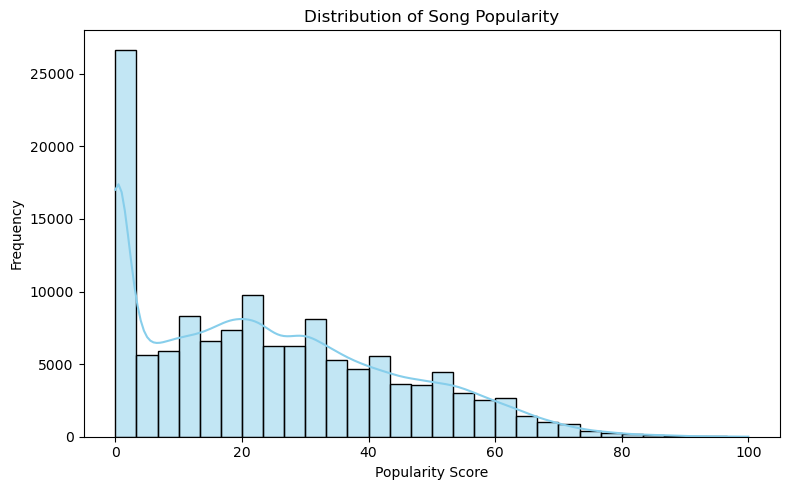

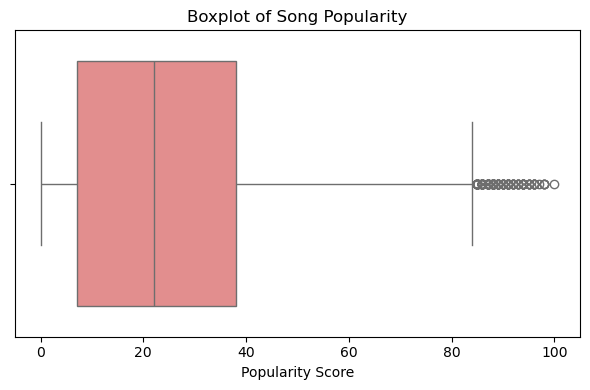


Skewness: 0.5782284090723453
Kurtosis: -0.478229688409916


In [10]:
# 1. Basic descriptive statistics
print("Descriptive statistics for 'popularity':")
print(df['popularity'].describe())

# 2. Check for unique values and missing data
print("\nNumber of unique popularity scores:", df['popularity'].nunique())
print("Any missing values?:", df['popularity'].isna().sum())

# 3. Plot distribution (histogram + KDE)
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Boxplot to visualize outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['popularity'], color='lightcoral')
plt.title('Boxplot of Song Popularity')
plt.xlabel('Popularity Score')
plt.tight_layout()
plt.show()

# 5. Optional: Skewness and kurtosis
print("\nSkewness:", df['popularity'].skew())
print("Kurtosis:", df['popularity'].kurt())

## Logistic Regression

In [27]:
df["hit"] = (df["popularity"] > 30).astype(int)

df["hit"].value_counts()

hit
0    84848
1    45814
Name: count, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# 1. Define Features + Target

features = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness',
    'acousticness', 'instrumentalness', 'speechiness', 'liveness'
]

X = df[features]
y = df['hit']   # binary target

# 2. Train-Test Split (80/20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 3. Scale Features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train Logistic Regression

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# 5. Predictions

y_pred = model.predict(X_test_scaled)

# 6. Evaluation Metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

print("---- Logistic Regression Performance ----")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)
print("\nConfusion Matrix:")
print(cm)


---- Logistic Regression Performance ----
Accuracy : 0.5960280105613592
Precision: 0.4522606470240829
Recall   : 0.7571962206108548
F1 Score : 0.5662873341276037

Confusion Matrix:
[[8684 8347]
 [2210 6892]]


In [63]:
# 1. Define Features + Target

features = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness',
    'acousticness', 'instrumentalness', 'speechiness', 'liveness'
]

X = df[features]
y = df['hit']   # binary target

# 2. Train-Test Split (80/20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 3. Scale Features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train Logistic Regression

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# 5. Predictions WITH CUSTOM THRESHOLD

# Get probabilities for the positive class ("hit")
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Apply your custom threshold
threshold = 0.65
y_pred = (y_proba >= threshold).astype(int)

# 6. Evaluation Metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

print("---- Logistic Regression Performance (Threshold =", threshold, ") ----")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)
print("\nConfusion Matrix:")
print(cm)


---- Logistic Regression Performance (Threshold = 0.65 ) ----
Accuracy : 0.653197107105958
Precision: 0.5079365079365079
Recall   : 0.13711272247857614
F1 Score : 0.21593563457046458

Confusion Matrix:
[[15822  1209]
 [ 7854  1248]]


scale_pos_weight: 1.8520094949660308

---- XGBoost Performance ----
Accuracy : 0.6197145371752191
Precision: 0.4734425330683298
Recall   : 0.7539015606242497
F1 Score : 0.5816283573292919

Confusion Matrix:
[[9287 7683]
 [2255 6908]]


<Figure size 1000x600 with 0 Axes>

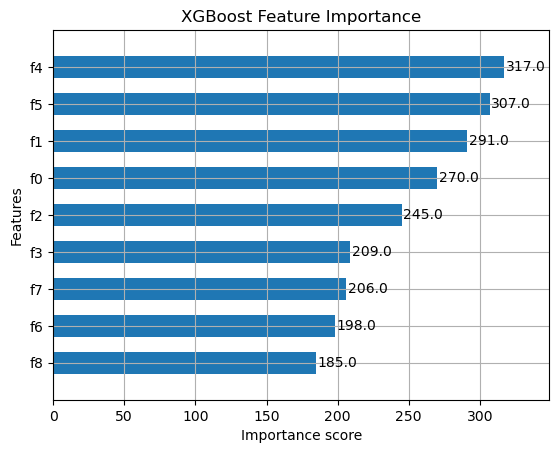

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt

# --------------------------------------
# 1. Features and target
# --------------------------------------
features = ['danceability', 'energy', 'valence', 'tempo', 'loudness',
            'acousticness', 'instrumentalness', 'speechiness', 'liveness']

X = df[features]
y = df['hit']

# --------------------------------------
# 2. Train/Test Split
# --------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# --------------------------------------
# 3. Standard Scaling
# --------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------
# 4. Compute scale_pos_weight
# --------------------------------------
num_pos = sum(y_train == 1)
num_neg = sum(y_train == 0)
scale_pos_weight = num_neg / num_pos

print("scale_pos_weight:", scale_pos_weight)

# --------------------------------------
# 5. XGBoost Model (simple baseline)
# --------------------------------------
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    learning_rate=0.1,
    max_depth=4,
    n_estimators=150,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_scaled, y_train)

# --------------------------------------
# 6. Predictions
# --------------------------------------
y_pred = model.predict(X_test_scaled)

# --------------------------------------
# 7. Metrics
# --------------------------------------
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n---- XGBoost Performance ----")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

print("\nConfusion Matrix:")
print(cm)

# --------------------------------------
# 8. Feature Importance Plot
# --------------------------------------
plt.figure(figsize=(10,6))
xgb.plot_importance(model, max_num_features=10, height=0.6)
plt.title("XGBoost Feature Importance")
plt.show()


scale_pos_weight = 1.8472706471998257
Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\Jonah\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:31:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Hyperparameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}

Best CV Recall: 0.7696666286172216

---- XGBoost Performance (Grid Search Tuned) ----
Accuracy : 0.6029541193127463
Precision: 0.45826235093696766
Recall   : 0.7684025488903538
F1 Score : 0.5741257593170251

Confusion Matrix:
[[8763 8268]
 [2108 6994]]


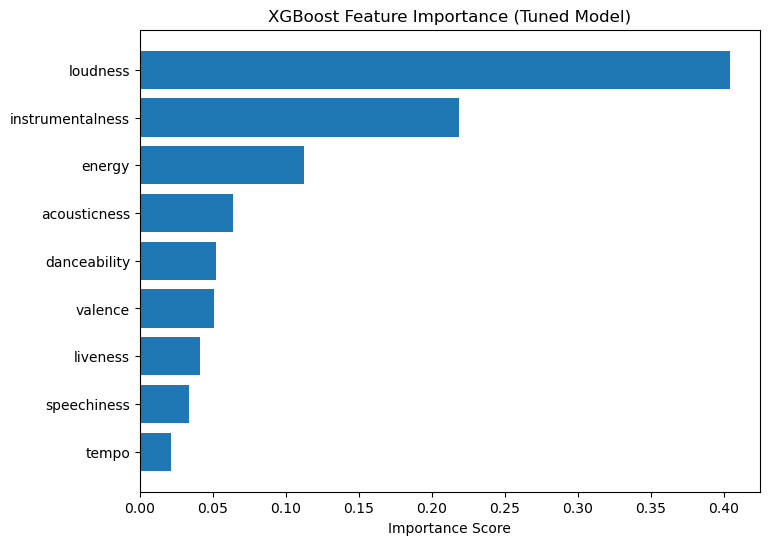

In [65]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ----------------------------------------
# 1. Define Features + Target
# ----------------------------------------
features = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness',
    'acousticness', 'instrumentalness', 'speechiness', 'liveness'
]

X = df[features]
y = df['hit']   # binary target (0/1)

# ----------------------------------------
# 2. Train-Test Split (80/20)
# ----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ----------------------------------------
# 3. Scale Features
# ----------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------------
# 4. Compute scale_pos_weight for imbalance
# ----------------------------------------
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos

print("scale_pos_weight =", scale_pos_weight)

# ----------------------------------------
# 5. Define Medium Grid
# ----------------------------------------
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# ----------------------------------------
# 6. Initialize XGBoost Model
# ----------------------------------------
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False
)

# ----------------------------------------
# 7. Grid Search (optimize Recall)
# ----------------------------------------
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="recall",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_scaled, y_train)

print("\nBest Hyperparameters:")
print(grid.best_params_)
print("\nBest CV Recall:", grid.best_score_)

# ----------------------------------------
# 8. Evaluate on Test Set
# ----------------------------------------
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

print("\n---- XGBoost Performance (Grid Search Tuned) ----")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)
print("\nConfusion Matrix:")
print(cm)

# ----------------------------------------
# 9. Feature Importance Plot
# ----------------------------------------
importances = best_model.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.barh(range(len(features)), importances[sorted_idx])
plt.yticks(range(len(features)), np.array(features)[sorted_idx])
plt.xlabel("Importance Score")
plt.title("XGBoost Feature Importance (Tuned Model)")
plt.show()


AUC: 0.6879260015481483


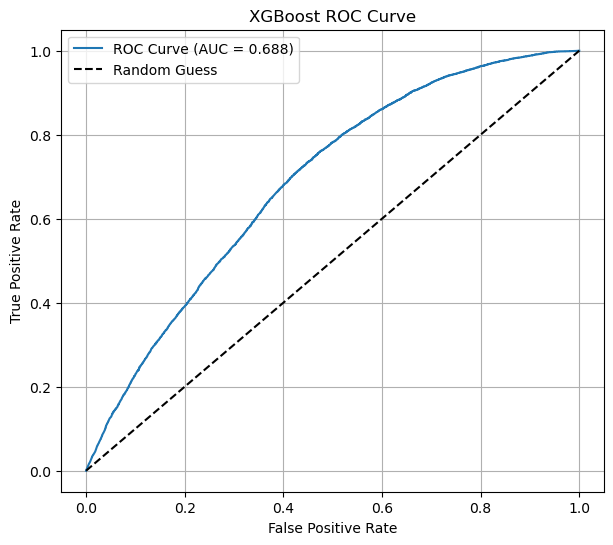

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Get the fitted XGBoost model from GridSearchCV
best_model = grid.best_estimator_    # <-- this is the trained model

# 2. Predicted probabilities for the positive class
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# 3. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# 4. Compute AUC
roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)

# 5. Plot ROC curve
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
